# Task 1: Exploratory Data Analysis (EDA)

## Step 1: Data Importing

In [12]:
import sqlite3
import pandas as pd

connection = sqlite3.connect('data/agri.db')

# Find the name of table we are querying
cursor = connection.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(table[0])  # Prints the table names

farm_data


In [13]:
query = "SELECT * FROM farm_data"
df = pd.read_sql_query(query, connection)

## Step 2: Data Overview

In [15]:
# Display first few rows to see what the data looks like
df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
1               Zone_G                     Herbs           VINE CROPS   
2               Zone_F                     Herbs                herbs   
3               Zone_G                     Herbs  fruiting vegetables   
4               Zone_B                Vine Crops         LEAFY GREENS   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34                  NaN   
1  Vegetative                   -24.16                63.14   
2    maturity                    23.84                  NaN   
3  Vegetative                    22.61                  NaN   
4    seedling                    22.88                  NaN   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
1                         441.0               938              2.13   
2                         562.0              1246              1.21   
3                         651.0              1346              1.96   
4                         144.0               812              2.76   

   O2 Sensor (ppm) Nutrient N Sensor (ppm) Nutrient P Sensor (ppm)  \
0                4                     161                      64   
1                6                     161                      53   
2                8                     228                      79   
3                6                    None                  53 ppm   
4                5                      61                      19   

  Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  
0                     201        6.1                28.150346  
1                    None        6.5                31.000000  
2                     292        6.4                26.000000  
3                     289        6.6                      NaN  
4                     168        5.5                28.000000

### We notice that there are NaN variables and formats which are not standardised. Thus, we will need to look into how we are going to deal with these variables later on.

In [17]:
# Display data types and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  object 
 11  Nutrient P Sensor (ppm)       51791 non-null  object 
 12  Nutrient K Sensor (ppm)       53788 non-null  object 
 13  p

### Here, we notice that some numerical columns (Nutrients N,P and K) are not in the correct Data Type (Object) instead of (float64/ int64). Thus, we will need to deal with that later as well.
### We can see that the amount of data entries for each column are not equal, meaning that there are many NaN data points to clean/ take action on.

## Step 3: Data Cleaning

### First, we will start by ensuring that all columns have correct data types, and to remove strings from numerical-data columns.

In [21]:
# Clean and convert non-numeric values to numeric values, as well as removing non-numeric strings

# Clean columns by ensuring they are strings and then removing 'ppm' or any non-numeric characters
df['Nutrient N Sensor (ppm)'] = pd.to_numeric(df['Nutrient N Sensor (ppm)'].astype(str).str.split(' ').str[0], errors='coerce')
df['Nutrient P Sensor (ppm)'] = pd.to_numeric(df['Nutrient P Sensor (ppm)'].astype(str).str.split(' ').str[0], errors='coerce')
df['Nutrient K Sensor (ppm)'] = pd.to_numeric(df['Nutrient K Sensor (ppm)'].astype(str).str.split(' ').str[0], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57489 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          57489 non-null  object 
 1   Previous Cycle Plant Type     57489 non-null  object 
 2   Plant Type                    57489 non-null  object 
 3   Plant Stage                   57489 non-null  object 
 4   Temperature Sensor (°C)       48800 non-null  float64
 5   Humidity Sensor (%)           18622 non-null  float64
 6   Light Intensity Sensor (lux)  53211 non-null  float64
 7   CO2 Sensor (ppm)              57489 non-null  int64  
 8   EC Sensor (dS/m)              57489 non-null  float64
 9   O2 Sensor (ppm)               57489 non-null  int64  
 10  Nutrient N Sensor (ppm)       47515 non-null  float64
 11  Nutrient P Sensor (ppm)       51791 non-null  float64
 12  Nutrient K Sensor (ppm)       53788 non-null  float64
 13  p

### We have successfully converted the data types of columns Nutrient N,P and K to numerical Data Type (float64). All the columns have their corresponding data types, Catergorical Columns with object and Numerical Columns with int64/float64.

In [23]:
df.describe()

Temperature Sensor (°C)  Humidity Sensor (%)  \
count             48800.000000         18622.000000   
mean                 22.138201            69.243535   
std                   7.556981             5.725973   
min                 -28.570000            59.220000   
25%                  22.140000            64.340000   
50%                  23.210000            68.700000   
75%                  24.350000            74.117500   
max                  28.750000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  53211.000000      57489.000000      57489.000000   
mean                     397.841668       1083.376576          1.624435   
std                      222.923860        172.570351          0.415535   
min                     -799.000000        799.000000         -0.250000   
25%                      257.000000        950.000000          1.360000   
50%                      403.000000       1071.000000          1.650000   
75%                      553.000000       1178.000000          1.900000   
max                      800.000000       1500.000000          3.440000   

       O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count     57489.000000             47515.000000             51791.000000   
mean          6.580842               157.684205                49.858431   
std           1.145534                45.700829                15.414867   
min           3.000000                49.000000                19.000000   
25%           6.000000               124.000000                37.000000   
50%           7.000000               158.000000                50.000000   
75%           7.000000               190.000000                62.000000   
max          11.000000               250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             53788.000000  57489.000000             48847.000000  
mean                217.990277      6.021446                25.716878  
std                  60.697365      0.400251                 5.815294  
min                  99.000000      3.800000                10.001955  
25%                 170.000000      5.800000                21.313361  
50%                 215.000000      6.000000                26.000000  
75%                 266.000000      6.300000                30.000000  
max                 350.000000      7.800000                39.998717

### Here, we can see that Temperature, Light intensity and EC sensor all have negative values, which do not make sense in an actual plant environment since negative temperature would indicate that the plant is frozen, and negative light intensity and EC values only happens when the sensor is faulty.
### Thus, we will need to remove these rows with negative values.

In [25]:
import numpy as np
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Remove rows where any of the numeric columns contain negative values
df = df[~(df[numeric_columns] < 0).any(axis=1)]

# Display the cleaned DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 54874 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          54874 non-null  object 
 1   Previous Cycle Plant Type     54874 non-null  object 
 2   Plant Type                    54874 non-null  object 
 3   Plant Stage                   54874 non-null  object 
 4   Temperature Sensor (°C)       46392 non-null  float64
 5   Humidity Sensor (%)           17841 non-null  float64
 6   Light Intensity Sensor (lux)  50709 non-null  float64
 7   CO2 Sensor (ppm)              54874 non-null  int64  
 8   EC Sensor (dS/m)              54874 non-null  float64
 9   O2 Sensor (ppm)               54874 non-null  int64  
 10  Nutrient N Sensor (ppm)       45329 non-null  float64
 11  Nutrient P Sensor (ppm)       49422 non-null  float64
 12  Nutrient K Sensor (ppm)       51343 non-null  float64
 13  pH Sen

Temperature Sensor (°C)  Humidity Sensor (%)  \
count             46392.000000         17841.000000   
mean                 23.336635            69.244153   
std                   1.615173             5.721533   
min                  18.930000            59.220000   
25%                  22.240000            64.350000   
50%                  23.265000            68.700000   
75%                  24.390000            74.100000   
max                  28.750000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  50709.000000      54874.000000      54874.000000   
mean                     419.859295       1083.506196          1.625177   
std                      178.663405        172.678382          0.414455   
min                       99.000000        799.000000          0.000000   
25%                      265.000000        950.000000          1.360000   
50%                      411.000000       1072.000000          1.650000   
75%                      557.000000       1178.000000          1.900000   
max                      800.000000       1500.000000          3.440000   

       O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count     54874.000000             45329.000000             49422.000000   
mean          6.580931               157.748461                49.867185   
std           1.145010                45.737077                15.413477   
min           3.000000                49.000000                19.000000   
25%           6.000000               124.000000                37.000000   
50%           7.000000               158.000000                50.000000   
75%           7.000000               190.000000                62.000000   
max          11.000000               250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             51343.000000  54874.000000             46635.000000  
mean                218.030773      6.021498                25.714312  
std                  60.725291      0.400712                 5.817864  
min                  99.000000      3.800000                10.001955  
25%                 170.000000      5.800000                21.296767  
50%                 215.000000      6.000000                26.000000  
75%                 266.000000      6.300000                30.000000  
max                 350.000000      7.800000                39.998717

### Here, we can see that there are no more negative values in our data frame, and its time to move onto dealing with our NaN values.

In [27]:
# Check for null entries
df.isnull().sum()

System Location Code                0
Previous Cycle Plant Type           0
Plant Type                          0
Plant Stage                         0
Temperature Sensor (°C)          8482
Humidity Sensor (%)             37033
Light Intensity Sensor (lux)     4165
CO2 Sensor (ppm)                    0
EC Sensor (dS/m)                    0
O2 Sensor (ppm)                     0
Nutrient N Sensor (ppm)          9545
Nutrient P Sensor (ppm)          5452
Nutrient K Sensor (ppm)          3531
pH Sensor                           0
Water Level Sensor (mm)          8239
dtype: int64

In [28]:
# Check proportion of missing data
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data)

System Location Code             0.000000
Previous Cycle Plant Type        0.000000
Plant Type                       0.000000
Plant Stage                      0.000000
Temperature Sensor (°C)         15.457229
Humidity Sensor (%)             67.487335
Light Intensity Sensor (lux)     7.590116
CO2 Sensor (ppm)                 0.000000
EC Sensor (dS/m)                 0.000000
O2 Sensor (ppm)                  0.000000
Nutrient N Sensor (ppm)         17.394394
Nutrient P Sensor (ppm)          9.935489
Nutrient K Sensor (ppm)          6.434741
pH Sensor                        0.000000
Water Level Sensor (mm)         15.014397
dtype: float64


### For columns with a sizeable amount of data missing (eg. Temperature [15.1%], Light Intensity [7.44%], Nutrient N [17.3%], Nutrient P [9.9%], Nutrient K [6.4%] Water level [15.0%] Sensors), we have the choice to replace NaN with either Median or Mean, based on their skewness, or to entirely drop all of the NaN rows.
### Since all the percentages is above 5%, these missing data might affect our analysis later on due to its sizeable portion.

## Step 4: Data Cleaning

### Let's take a look at any potential correlations between humidity and temperature.

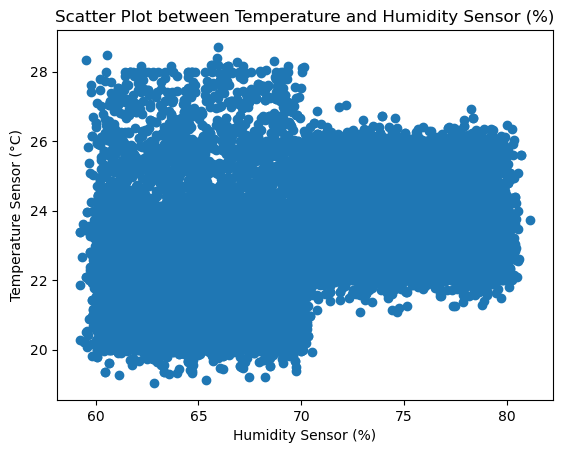

In [32]:
import matplotlib.pyplot as plt

#Scatter plot between 'Temperature' and 'Humidity'
plt.scatter(df['Humidity Sensor (%)'], df['Temperature Sensor (°C)'])
plt.xlabel('Humidity Sensor (%)')  # Label for the x-axis
plt.ylabel('Temperature Sensor (°C)')  # Label for the y-axis
plt.title('Scatter Plot between Temperature and Humidity Sensor (%)')  # Title of the plot
plt.show()

### From the scatter plot above, we can see that when humidity is above 70%, the temperature data points are onlyl in the range of around 22 to 26 degree celcius. As well as the fact that the data points are less concentrated around 26-28 degree celcius when humidity is 60-70%. This means that there are potential correlation and trends between humidity and temperature, which might improve our EDA and effectiveness of our machine learning models.

### Next, we will look how we should deal with our other NaN values first before we start deciding how we should fill the NaN values for humidity column.

### After doing EDA on both filling NaN values and dropping NaN values and even though dropping NaN values will lose about 3/8 of our data set, the general trends and correlations are much more obvious and stronger when using the approach of dropping NaN.
### Both methods do follow the same trend, but dropping NaNs would be more beneficial since there is better segregation of data points and it ultimately allows for a faster and more efficient machine learning algorithm. 
### Filling NaNs also introduce bias to our data set and might not reflect the true nature of the missing values.

In [35]:
# Drop NaN values in all columns except for 'Humidity Sensor (%)'
df = df.dropna(subset=[col for col in df.columns if col != 'Humidity Sensor (%)'])

# Display the DataFrame to check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25329 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          25329 non-null  object 
 1   Previous Cycle Plant Type     25329 non-null  object 
 2   Plant Type                    25329 non-null  object 
 3   Plant Stage                   25329 non-null  object 
 4   Temperature Sensor (°C)       25329 non-null  float64
 5   Humidity Sensor (%)           8085 non-null   float64
 6   Light Intensity Sensor (lux)  25329 non-null  float64
 7   CO2 Sensor (ppm)              25329 non-null  int64  
 8   EC Sensor (dS/m)              25329 non-null  float64
 9   O2 Sensor (ppm)               25329 non-null  int64  
 10  Nutrient N Sensor (ppm)       25329 non-null  float64
 11  Nutrient P Sensor (ppm)       25329 non-null  float64
 12  Nutrient K Sensor (ppm)       25329 non-null  float64
 13  pH Sen

### Although we did lose quite a number of data points, the trends and data visualisation are still reliable since it is similar to without dropping the NaNs.
### Next, we will use KNN to impute our missing humidity values. This is to preserve the previous trend observed.

In [37]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Humidity Sensor (%)'] = imputer.fit_transform(df[['Humidity Sensor (%)']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25329 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          25329 non-null  object 
 1   Previous Cycle Plant Type     25329 non-null  object 
 2   Plant Type                    25329 non-null  object 
 3   Plant Stage                   25329 non-null  object 
 4   Temperature Sensor (°C)       25329 non-null  float64
 5   Humidity Sensor (%)           25329 non-null  float64
 6   Light Intensity Sensor (lux)  25329 non-null  float64
 7   CO2 Sensor (ppm)              25329 non-null  int64  
 8   EC Sensor (dS/m)              25329 non-null  float64
 9   O2 Sensor (ppm)               25329 non-null  int64  
 10  Nutrient N Sensor (ppm)       25329 non-null  float64
 11  Nutrient P Sensor (ppm)       25329 non-null  float64
 12  Nutrient K Sensor (ppm)       25329 non-null  float64
 13  pH Sen

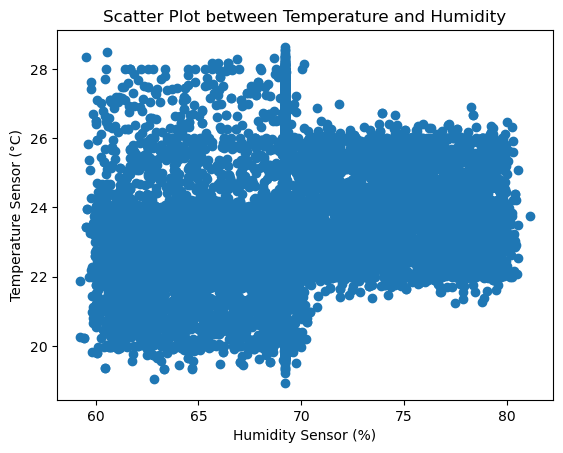

Correlation between Temperature and Humidty: 0.16602451225776563


In [38]:
#Scatter plot between 'Temperature' and 'Humidity'
plt.scatter(df['Humidity Sensor (%)'], df['Temperature Sensor (°C)'])
plt.xlabel('Humidity Sensor (%)')  # Label for the x-axis
plt.ylabel('Temperature Sensor (°C)')  # Label for the y-axis
plt.title('Scatter Plot between Temperature and Humidity')  # Title of the plot
plt.show()

# Calculate correlation between two columns
correlation = df['Humidity Sensor (%)'].corr(df['Temperature Sensor (°C)'])
print(f"Correlation between Temperature and Humidty: {correlation}")

### Above is our final humidity vs temperature column scatter plot after imputing missing values, it still preserves the general trend but with a lower correlation which is helpful for our EDA.

In [40]:
# Get all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Loop through all numeric columns for outlier detection
for column in numeric_columns:
    # Drop NaN values for the current column before calculating IQR
    column_data = df[column].dropna()

    # Calculate Q1, Q3, and IQR only on the non-null values
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers for the current column (exclude NaN)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the number of outliers found (excluding NaN rows)
    print(f"Number of outliers found in {column}: {outliers.shape[0]}")

Number of outliers found in Temperature Sensor (°C): 193
Number of outliers found in Humidity Sensor (%): 8085
Number of outliers found in Light Intensity Sensor (lux): 0
Number of outliers found in CO2 Sensor (ppm): 0
Number of outliers found in EC Sensor (dS/m): 401
Number of outliers found in O2 Sensor (ppm): 1960
Number of outliers found in Nutrient N Sensor (ppm): 0
Number of outliers found in Nutrient P Sensor (ppm): 0
Number of outliers found in Nutrient K Sensor (ppm): 0
Number of outliers found in pH Sensor: 466
Number of outliers found in Water Level Sensor (mm): 0


### As for outliers, we will not remove them because we have already removed quite a number of our data points, and these outliers may be beneficial in our machine learning model.
### Most of the outliers come from humidity as well which is to be expected since we imputed the values using KNN, and removing the outliers would remove a lot of rows due to the humidity column.

In [42]:
#Check newly cleaned Data
cleaned_df = df
cleaned_df.info()
print("")
#Basic Statistics of our cleaned Data
cleaned_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 25329 entries, 0 to 57488
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          25329 non-null  object 
 1   Previous Cycle Plant Type     25329 non-null  object 
 2   Plant Type                    25329 non-null  object 
 3   Plant Stage                   25329 non-null  object 
 4   Temperature Sensor (°C)       25329 non-null  float64
 5   Humidity Sensor (%)           25329 non-null  float64
 6   Light Intensity Sensor (lux)  25329 non-null  float64
 7   CO2 Sensor (ppm)              25329 non-null  int64  
 8   EC Sensor (dS/m)              25329 non-null  float64
 9   O2 Sensor (ppm)               25329 non-null  int64  
 10  Nutrient N Sensor (ppm)       25329 non-null  float64
 11  Nutrient P Sensor (ppm)       25329 non-null  float64
 12  Nutrient K Sensor (ppm)       25329 non-null  float64
 13  pH Sen

Temperature Sensor (°C)  Humidity Sensor (%)  \
count             25329.000000         25329.000000   
mean                 23.336096            69.222787   
std                   1.609041             3.236733   
min                  18.930000            59.220000   
25%                  22.240000            69.222787   
50%                  23.290000            69.222787   
75%                  24.370000            69.222787   
max                  28.640000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  25329.000000      25329.000000      25329.000000   
mean                     418.653836       1082.451617          1.625509   
std                      178.486125        172.230093          0.415192   
min                      100.000000        799.000000          0.010000   
25%                      265.000000        949.000000          1.360000   
50%                      409.000000       1071.000000          1.650000   
75%                      554.000000       1178.000000          1.900000   
max                      800.000000       1499.000000          3.440000   

       O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count     25329.000000             25329.000000             25329.000000   
mean          6.558530               157.686802                49.864266   
std           1.144169                46.028481                15.493018   
min           3.000000                49.000000                19.000000   
25%           6.000000               124.000000                37.000000   
50%           6.000000               158.000000                50.000000   
75%           7.000000               191.000000                62.000000   
max          11.000000               250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             25329.000000  25329.000000             25329.000000  
mean                217.780054      6.018868                25.678008  
std                  61.040343      0.400760                 5.814898  
min                  99.000000      4.100000                10.001955  
25%                 170.000000      5.800000                21.000000  
50%                 214.000000      6.000000                25.770148  
75%                 266.000000      6.300000                30.000000  
max                 350.000000      7.700000                39.998098

### Now that our numerical columns are cleaned, we will now look at our categorical columns and format them properly.

In [44]:
# Check for different formating of Object data types
uniqueSLC = cleaned_df['System Location Code'].unique()
print(uniqueSLC)

['Zone_D' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_G' 'Zone_A' 'Zone_E']


In [45]:
uniquePCPT = cleaned_df['Previous Cycle Plant Type'].unique()
print(uniquePCPT)

['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']


In [46]:
uniquePT = cleaned_df['Plant Type'].unique()
print(uniquePT)

['Vine Crops' 'herbs' 'LEAFY GREENS' 'FRUITING VEGETABLES'
 'Fruiting Vegetables' 'Leafy Greens' 'vine crops' 'Herbs' 'HERBS'
 'VINE CROPS' 'fruiting vegetables' 'leafy greens']


### Here, we notice that some Plant Types are formatted differently, thus we will need to standardise their format with Pascal Case

In [48]:
# Change all unique Plant Type to Pascal Case/ Title (Start of each word is Capitalized)
cleaned_df['Plant Type'] = cleaned_df['Plant Type'].str.title()
uniquePT = cleaned_df['Plant Type'].unique()
print(uniquePT)

['Vine Crops' 'Herbs' 'Leafy Greens' 'Fruiting Vegetables']


In [49]:
uniquePS = cleaned_df['Plant Stage'].unique()
print(uniquePS)

['Maturity' 'maturity' 'seedling' 'MATURITY' 'Seedling' 'Vegetative'
 'SEEDLING' 'vegetative' 'VEGETATIVE']


### Here, we notice that some Plant Stages are formatted differently as well, thus we will need to standardise their format with Pascal Case too

In [51]:
# Change all unique Plant Stage to Pascal Case/ Title (Start of each word is Capitalized)
cleaned_df['Plant Stage'] = cleaned_df['Plant Stage'].str.title()
uniquePS = cleaned_df['Plant Stage'].unique()
print(uniquePS)

['Maturity' 'Seedling' 'Vegetative']


## Step 5: Overview and Statistical Summary of Cleaned Data

In [53]:
# Checking for all variables standardisation
print(cleaned_df['System Location Code'].unique())
print(cleaned_df['Previous Cycle Plant Type'].unique())
print(cleaned_df['Plant Type'].unique())
print(cleaned_df['Plant Stage'].unique())

# Checking for values which do not make sense in the real world
cleaned_df.describe()

['Zone_D' 'Zone_F' 'Zone_B' 'Zone_C' 'Zone_G' 'Zone_A' 'Zone_E']
['Herbs' 'Vine Crops' 'Leafy Greens' 'Fruiting Vegetables']
['Vine Crops' 'Herbs' 'Leafy Greens' 'Fruiting Vegetables']
['Maturity' 'Seedling' 'Vegetative']


Temperature Sensor (°C)  Humidity Sensor (%)  \
count             25329.000000         25329.000000   
mean                 23.336096            69.222787   
std                   1.609041             3.236733   
min                  18.930000            59.220000   
25%                  22.240000            69.222787   
50%                  23.290000            69.222787   
75%                  24.370000            69.222787   
max                  28.640000            81.140000   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
count                  25329.000000      25329.000000      25329.000000   
mean                     418.653836       1082.451617          1.625509   
std                      178.486125        172.230093          0.415192   
min                      100.000000        799.000000          0.010000   
25%                      265.000000        949.000000          1.360000   
50%                      409.000000       1071.000000          1.650000   
75%                      554.000000       1178.000000          1.900000   
max                      800.000000       1499.000000          3.440000   

       O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
count     25329.000000             25329.000000             25329.000000   
mean          6.558530               157.686802                49.864266   
std           1.144169                46.028481                15.493018   
min           3.000000                49.000000                19.000000   
25%           6.000000               124.000000                37.000000   
50%           6.000000               158.000000                50.000000   
75%           7.000000               191.000000                62.000000   
max          11.000000               250.000000                80.000000   

       Nutrient K Sensor (ppm)     pH Sensor  Water Level Sensor (mm)  
count             25329.000000  25329.000000             25329.000000  
mean                217.780054      6.018868                25.678008  
std                  61.040343      0.400760                 5.814898  
min                  99.000000      4.100000                10.001955  
25%                 170.000000      5.800000                21.000000  
50%                 214.000000      6.000000                25.770148  
75%                 266.000000      6.300000                30.000000  
max                 350.000000      7.700000                39.998098

### Here, we can see that our data has finally been cleaned, with standardised formatting of Objects, as well as no negative or NaN values for any of the sensors.

## Step 6: Data Visualisation

### Check for relationship between Temperature and other variables, as well as Plant Stage and Plant Type with other variables

In [57]:
# Importing relevant packages for data visualisation
import seaborn as sb
import matplotlib.pyplot as plt

### Temperature Analysis

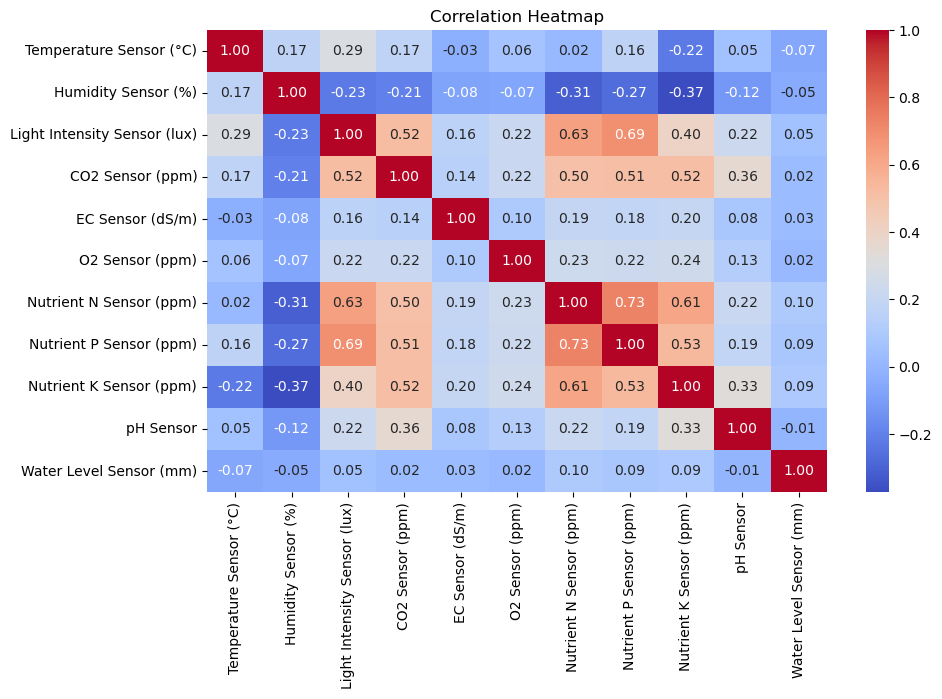

In [59]:
# Create a heatmap to check for correlations between numeric variables
heatmap_df = cleaned_df.select_dtypes(include=['number'])
correlation = heatmap_df.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

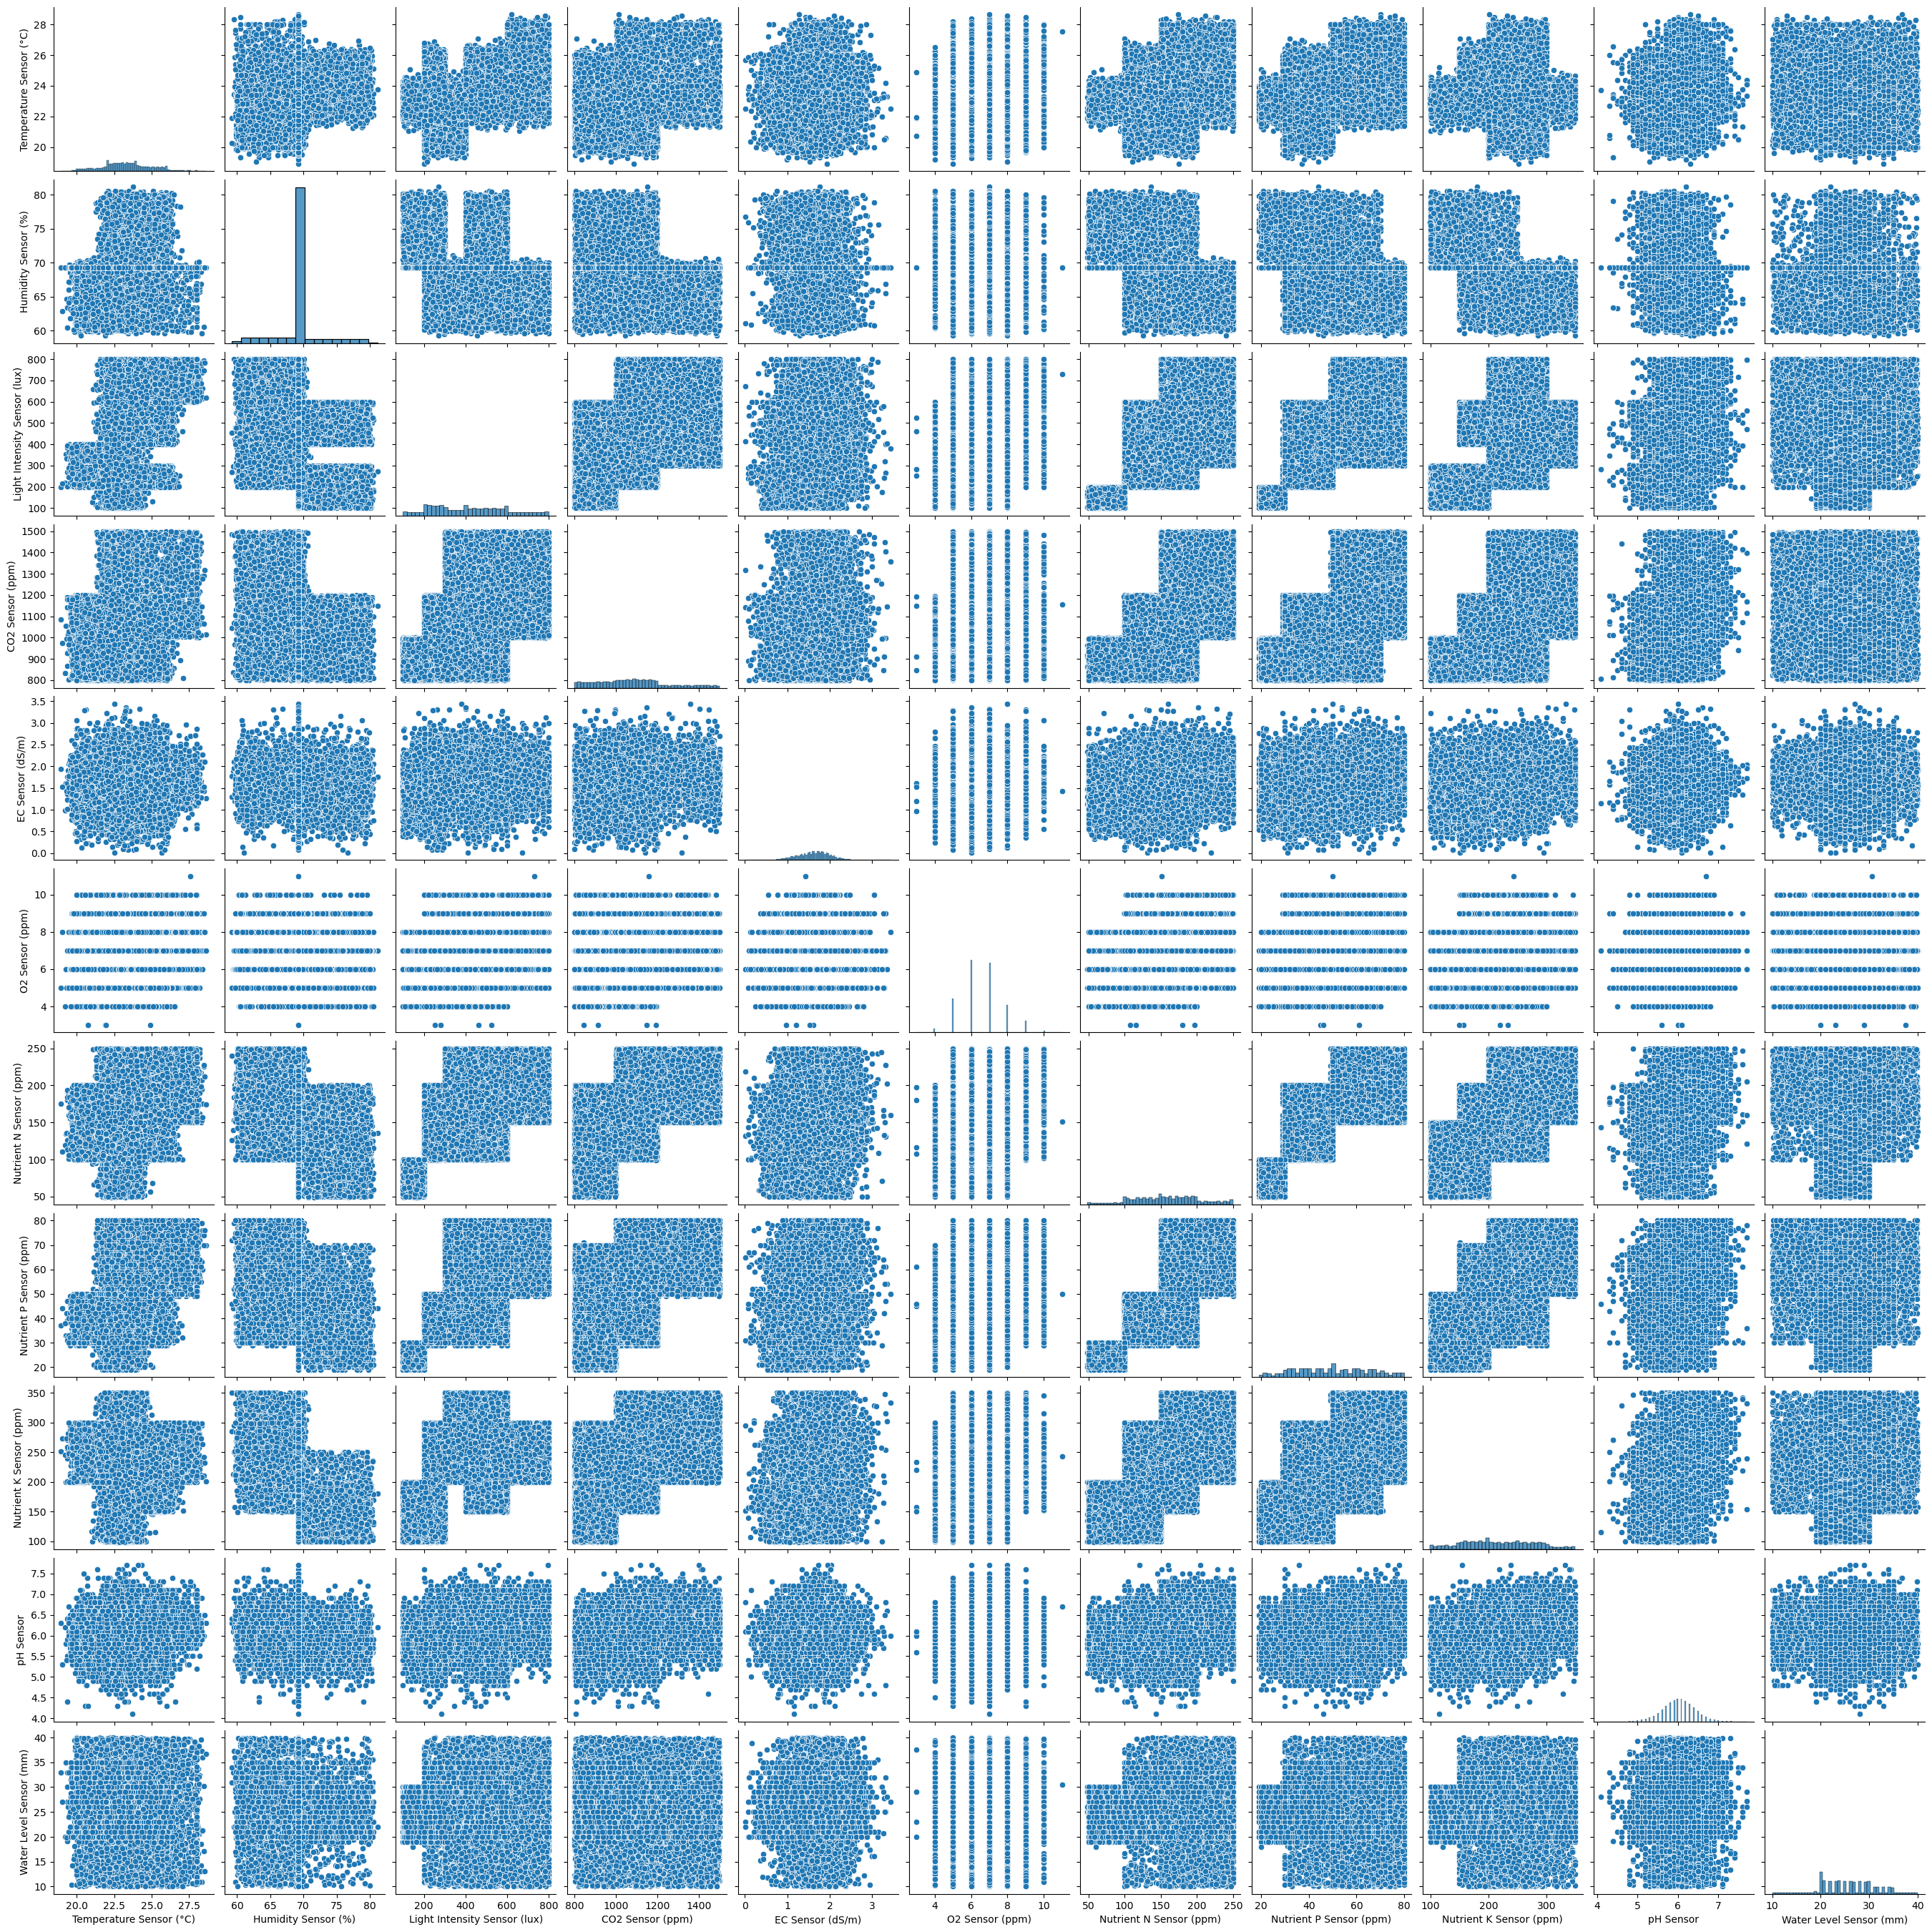

In [60]:
sb.pairplot(cleaned_df)

### From the heatmap and pairplots observed above, we can see that Light Intensity, Humidity, Nutrient K and CO2 Sensor have the highest correlation with Temperature, thus, we will consider these 4 columns as our Key Features for our Temperature prediction Machine Learning Model.
### Next, we will analyse the histogram plots for Temerpature vs Categorical Columns, to infer certain trends or correlations.

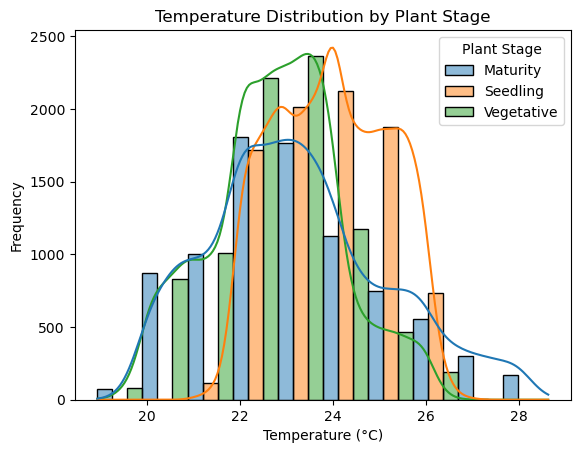

In [62]:
sb.histplot(data=cleaned_df, x='Temperature Sensor (°C)', hue='Plant Stage', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Temperature Distribution by Plant Stage')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### We can observe that different Plant Stages do lead to different Temperature distributions. Thus, we can consider Plant Stage as one of our Key Features too.

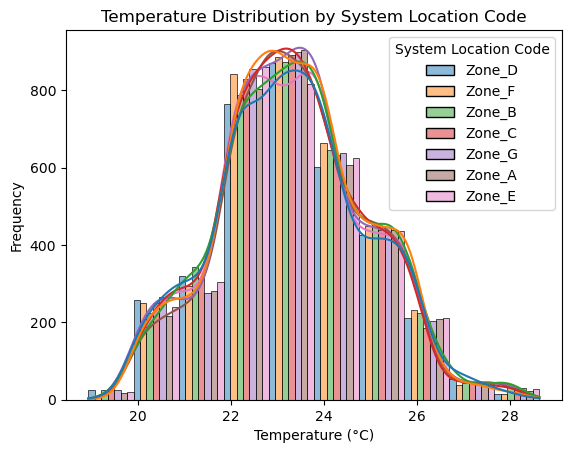

In [64]:
sb.histplot(data=cleaned_df, x='Temperature Sensor (°C)', hue='System Location Code', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Temperature Distribution by System Location Code')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### No segregations observed with different System Location Code.

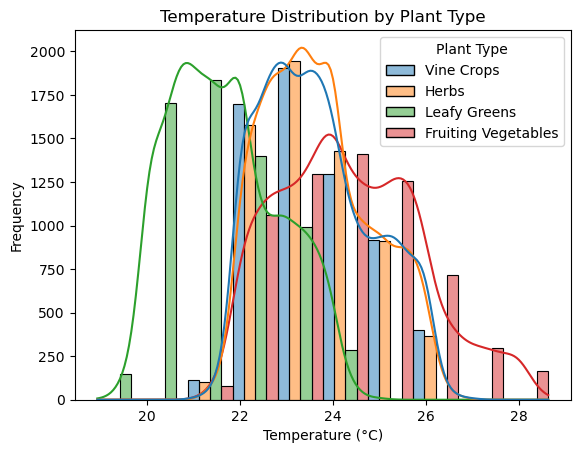

In [66]:
sb.histplot(data=cleaned_df, x='Temperature Sensor (°C)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Temperature Distribution by Plant Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### We can observe that different Plant Types do lead to significantly different Temperature distributions. Thus, we can consider Plant Type as one of our Key Features too.

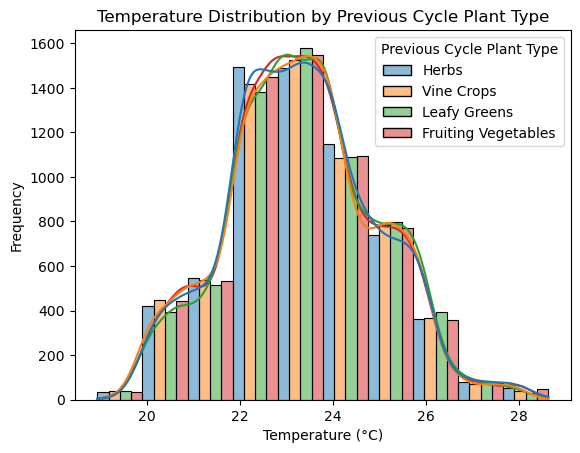

In [68]:
sb.histplot(data=cleaned_df, x='Temperature Sensor (°C)', hue='Previous Cycle Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Temperature Distribution by Previous Cycle Plant Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### No segregations observed with different Previous Cycle Plant Type.

### With the results found from comparing Temperature readings with all other variables, the key features which we will be utilising for our Temperature Prediction Machine Learning will be: [Light Intensity, Humidity, Nutrient K, CO2 sensor, as well as Plant Type and Plant Stage].

## Plant Type-Stage Analysis

### Analysis of Plant Type vs Sensor Readings

In [73]:
# Combine 'Plant Type' and 'Plant Stage' into one categorical column
cleaned_df['Plant Type-Stage'] = cleaned_df['Plant Type'] + '-' + cleaned_df['Plant Stage']

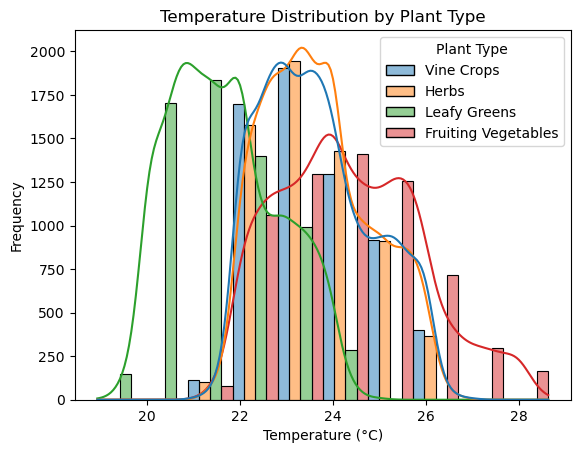

In [74]:
sb.histplot(data=cleaned_df, x='Temperature Sensor (°C)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Temperature Distribution by Plant Type')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different Temperature affects the distribution of different Plant Types. Thus, Temperature might be one of our key features fed into our Machine Learning Programme.

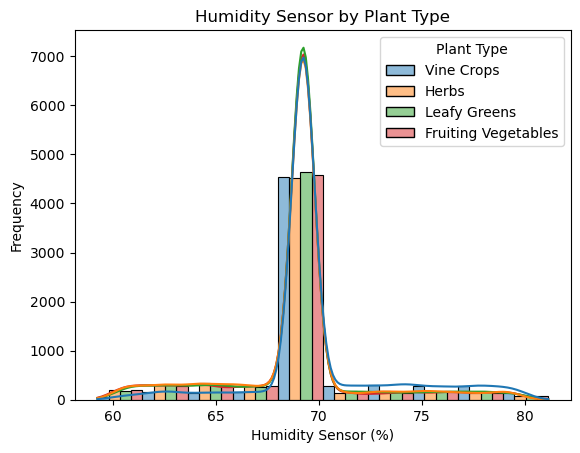

In [76]:
sb.histplot(data=cleaned_df, x='Humidity Sensor (%)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Humidity Sensor by Plant Type')
plt.xlabel('Humidity Sensor (%)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### No clear segregations, thus, not one of our key features.

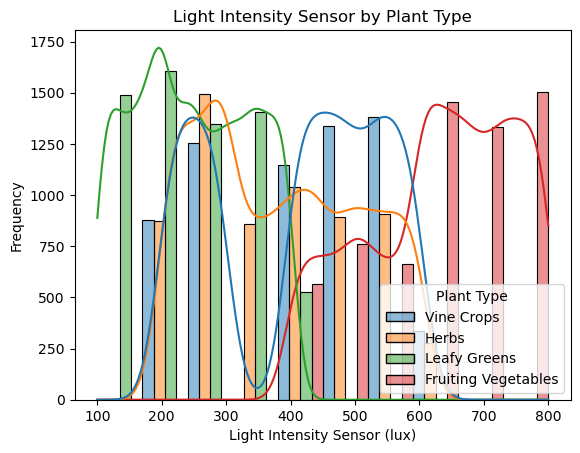

In [78]:
sb.histplot(data=cleaned_df, x='Light Intensity Sensor (lux)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Light Intensity Sensor by Plant Type')
plt.xlabel('Light Intensity Sensor (lux)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different Light Intensity Readings can create deviations in distributions of Plant Types. Thus, Light Intensity might be one of our key features to be fed into our Machine Learning Programme as well.

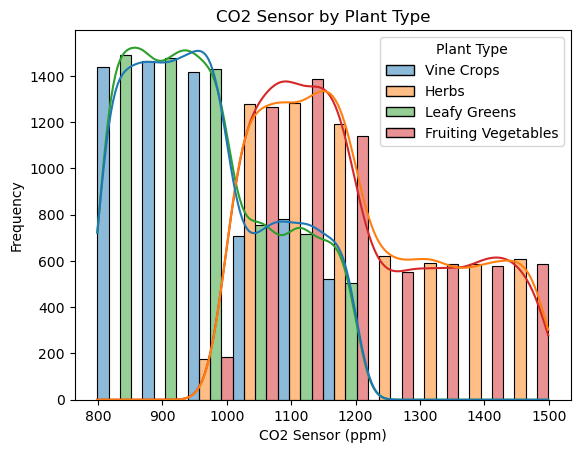

In [80]:
sb.histplot(data=cleaned_df, x='CO2 Sensor (ppm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('CO2 Sensor by Plant Type')
plt.xlabel('CO2 Sensor (ppm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From the Histogram above, the different Plant Types do create a clear segregation between [Vine Crops and Leafy Greens] and [Herbs and Fruiting Vegetables], thus, it might also be a useful feature to feed into our Machine Learning Programme.

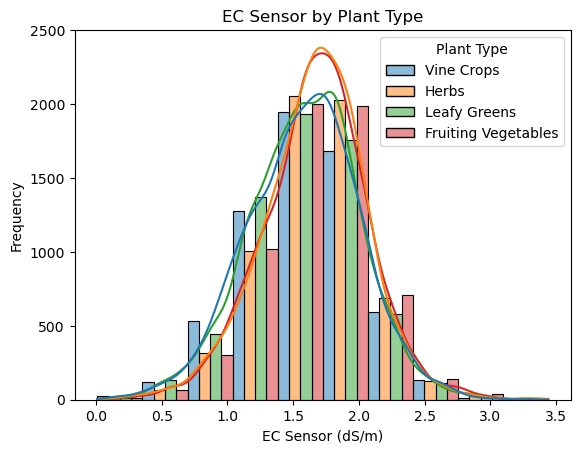

In [82]:
sb.histplot(data=cleaned_df, x='EC Sensor (dS/m)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('EC Sensor by Plant Type')
plt.xlabel('EC Sensor (dS/m)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From the Histogram above, there are no clear segregations between Plant Types at all. Thus, EC sensor will not be a key feature we will utilise.

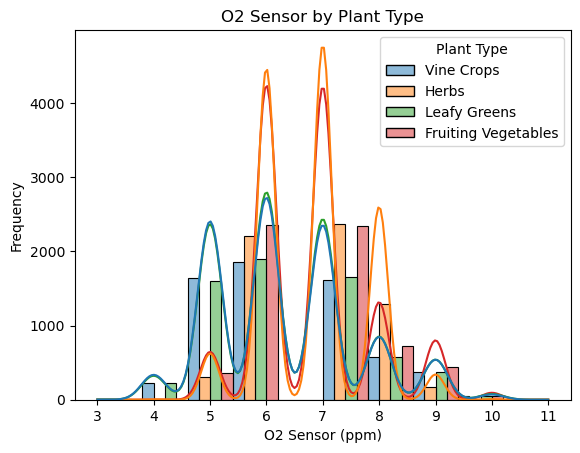

In [84]:
sb.histplot(data=cleaned_df, x='O2 Sensor (ppm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('O2 Sensor by Plant Type')
plt.xlabel('O2 Sensor (ppm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, although there are slight variations in the distribution of Vine Crops and Herbs, the segregation is not as prominent as the previous key features mentioned earlier, thus we will not be utilising O2 as our key feature.

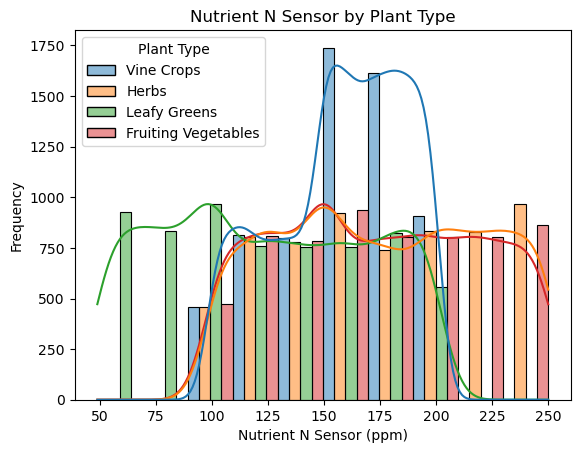

In [86]:
sb.histplot(data=cleaned_df, x='Nutrient N Sensor (ppm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Nutrient N Sensor by Plant Type')
plt.xlabel('Nutrient N Sensor (ppm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different Nutrient N readings can create deviations in distributions of Plant Types. Thus, Nutrient N Sensor might be one of the key features we might take into consideration.

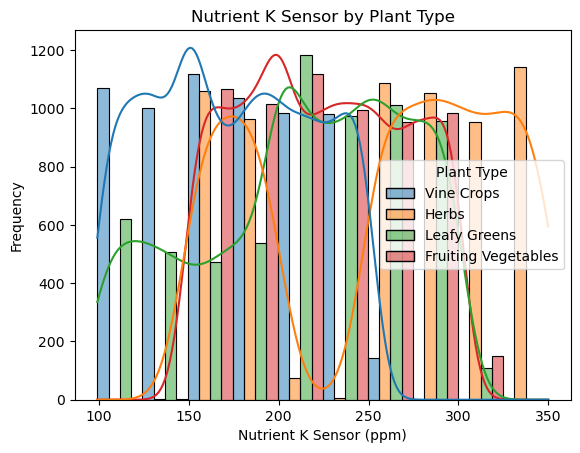

In [88]:
sb.histplot(data=cleaned_df, x='Nutrient K Sensor (ppm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Nutrient K Sensor by Plant Type')
plt.xlabel('Nutrient K Sensor (ppm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different Nutrient K readings can create deviations in distributions of Plant Types. Thus, Nutrient K Sensor might be one of the key features we might take into consideration as well.

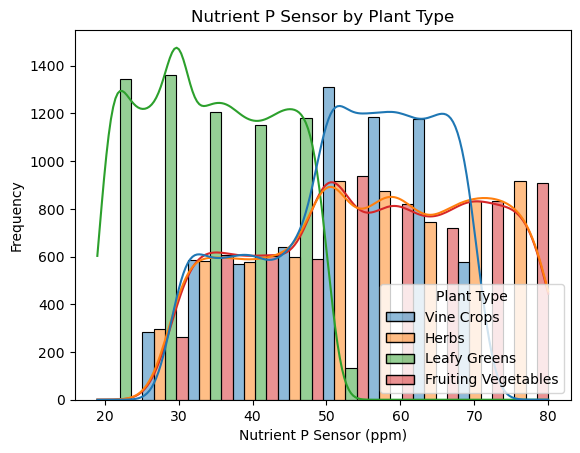

In [90]:
sb.histplot(data=cleaned_df, x='Nutrient P Sensor (ppm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Nutrient P Sensor by Plant Type')
plt.xlabel('Nutrient P Sensor (ppm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different Nutrient P readings can create deviations in distributions of Plant Types. However, the segregation from Nutrient P is more significant than Nutrient N and K. Thus, Nutrient P Sensor might be one of the more important key feature we might take into consideration, as compared to the other Nutrients.

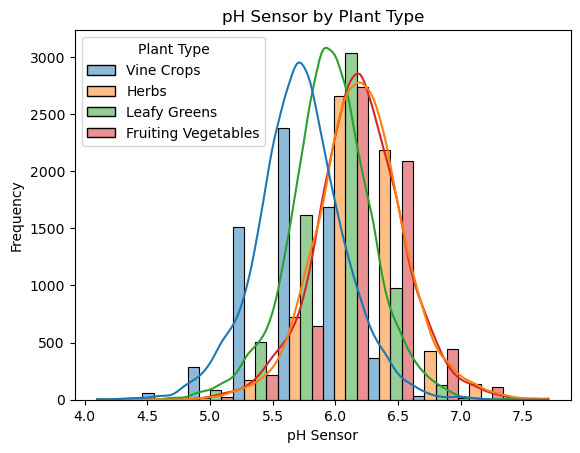

In [92]:
sb.histplot(data=cleaned_df, x='pH Sensor', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('pH Sensor by Plant Type')
plt.xlabel('pH Sensor')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From this Histogram above, we can see that different pH readings can create deviations in distributions of Plant Types. Thus, pH Sensor readings might be one of the key features we might take into consideration as well.

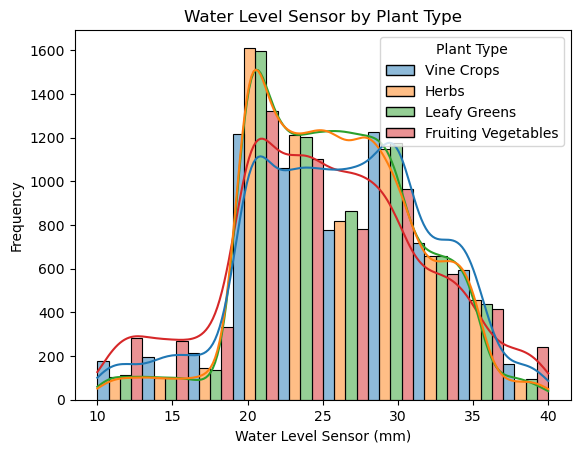

In [94]:
sb.histplot(data=cleaned_df, x='Water Level Sensor (mm)', hue='Plant Type', multiple='dodge', bins=10, kde=True)

# Adding title and labels
plt.title('Water Level Sensor by Plant Type')
plt.xlabel('Water Level Sensor (mm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### From the Histogram above, there are no clear segregations between Plant Types at all. Thus, Water Level sensor will not be a key feature we will utilise.

### After analysing the histogram for Plant Types VS all sensor readings, we can assume that some of the key features we will be using will be from the list: [Temperature, Light Intensity, CO2, Nutrient N, P, K, and pH]. 

### Next we will move on to find the correlation between Plant Stages and the sensor readings to further narrow down our choices of key features.

### We can Label Encode the Plant Stages because the Stages are ordinal.

In [99]:
# Start to Label Encode Plant Stages
mapping = {'Seedling': 1, 'Vegetative': 2, 'Maturity': 3}
cleaned_df['Labelled Plant Stage'] = cleaned_df['Plant Stage'].map(mapping)
cleaned_df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
4               Zone_B                Vine Crops         Leafy Greens   
5               Zone_C                Vine Crops  Fruiting Vegetables   
9               Zone_B                Vine Crops           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34            69.222787   
2    Maturity                    23.84            69.222787   
4    Seedling                    22.88            69.222787   
5    Maturity                    25.96            69.222787   
9    Maturity                    25.59            69.222787   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
2                         562.0              1246              1.21   
4                         144.0               812              2.76   
5                         675.0              1338              1.75   
9                         435.0               845              2.07   

   O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
0                4                    161.0                     64.0   
2                8                    228.0                     79.0   
4                5                     61.0                     19.0   
5                8                    227.0                     53.0   
9                8                    150.0                     70.0   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  \
0                    201.0        6.1                28.150346   
2                    292.0        6.4                26.000000   
4                    168.0        5.5                28.000000   
5                    258.0        6.2                23.092135   
9                    210.0        5.3                27.835062   

               Plant Type-Stage  Labelled Plant Stage  
0           Vine Crops-Maturity                     3  
2                Herbs-Maturity                     3  
4         Leafy Greens-Seedling                     1  
5  Fruiting Vegetables-Maturity                     3  
9           Vine Crops-Maturity                     3

### Next we can find correlations between the Label Encodded Plant Stages with other Numerical Columns/ different Sensor values.

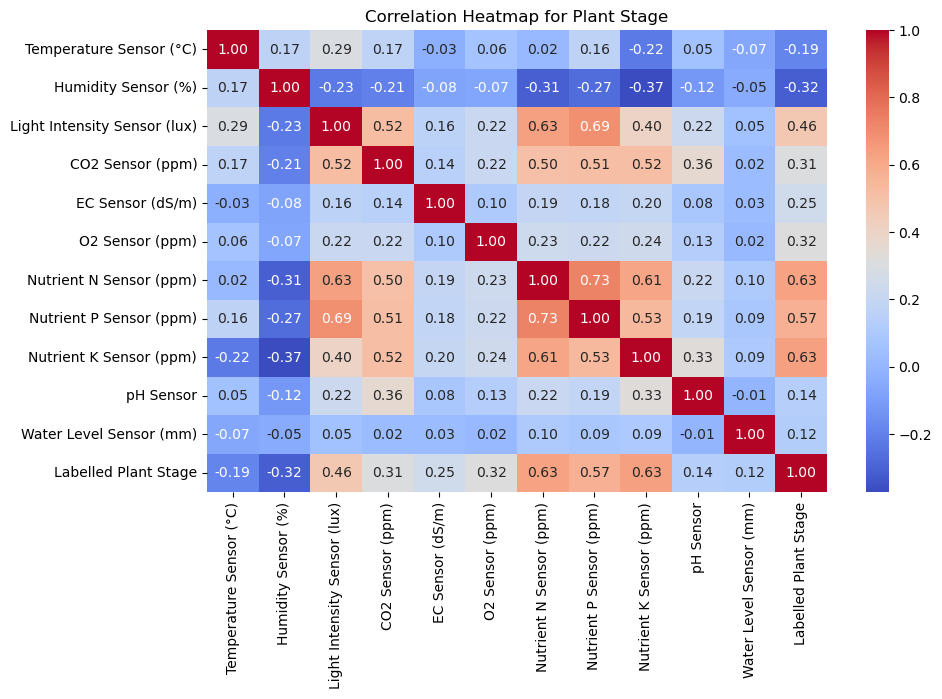

In [101]:
heatmap_df2 = cleaned_df.select_dtypes(include=['number'])
correlation = heatmap_df2.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Plant Stage')
plt.show()

### From the heatmap above, we can see that Nutrients N, P and K, Light Intensity Sensor, Humidity, O2 Sensor and CO2 Sensors have the highest correlations with current Plant Stage.

### Plant Type Key Features: [Temperature, Light Intensity, CO2, Nutrient N, P, K, and pH]. 
### Plant Stage Key Features: [Light Intensity Sensor, Humidity, O2 Sensor, CO2 Sensor, Nutrient N, P & K]
### Overall Overlapping Key Features to be used for predicting Plant Type-Stage: [Light Intensity Sensor, CO2 Sensor, Nutrients N, P and K]

### In addition, we can now also see that the correlation between Plant Stage and Temperature is -0.19, which is the third highest correlation variable for Temperature. Thus, further supporting the fact that Plant Stage should be a key feature for the predicting of Temperature Sensor readings.
### To summarise, key features for Temperature prediction are: [Light Intensity, Humidty, Nutrient K, CO2 sensor, as well as Plant Type and Plant Stage].
### Key Features for Plant Type-Stage prediction are: [Light Intensity Sensor, CO2 Sensor, Nutrients N, P and K]. 
### However, let's take a closer look at our Plant Type and Stage Key features. Temperature readings variance are in favour of plant type but not in favour of plant stage, and humidity readings variance are in favour of humidity but not in favour of plant type at all. Thus means that even though we are trying to predict the combined Plant Type-Stage, some key features that would definitely help in the predicting of either plant type or stage will not be utilised (eg. Humidity for Plant Stage and Temperature for Plant Type). If we could still include these variables in, it might produce a better result but will make it harder and overfit due to the higher number of dimensions.
### To combat this, we will use Principle Component Analysis (PCA) for our Plant Type-Stage Prediction. It helps to take every column into account and allows for a more accurate grouping of data points. Since all of the columns which we will be using are numerical data columns, there will be multicolinearity which might affect our model's effectiveness if we just put many different raw key feature columns instead of using PCA. Thus, we will create a PCA dataframe which will explain 95% of the variance of our data points to use for our 

In [105]:
# Define the target variable
target = 'Plant Type-Stage'

# Select all columns except target and 'Plant Stage' for X
X = cleaned_df.drop(columns=[target, 'Plant Stage', 'Plant Type', 'System Location Code', 'Previous Cycle Plant Type', 'Labelled Plant Stage'])

# Separate the target variable from the features (use all columns except target and 'Plant Stage')
y = cleaned_df[target]

print(X)

       Temperature Sensor (°C)  Humidity Sensor (%)  \
0                        23.34            69.222787   
2                        23.84            69.222787   
4                        22.88            69.222787   
5                        25.96            69.222787   
9                        25.59            69.222787   
...                        ...                  ...   
57481                    20.70            69.222787   
57483                    25.79            69.222787   
57486                    24.85            69.222787   
57487                    23.45            64.890000   
57488                    20.00            69.222787   

       Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                             454.0               937              1.82   
2                             562.0              1246              1.21   
4                             144.0               812              2.76   
5                             675.0    

### All and only sensor data are present

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the feature data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to store the cumulative explained variance ratio for each number of components
explained_variances = []

# Fit PCA and calculate the explained variance for all components
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to explain at least 85% of the variance
threshold_variance = 0.95
optimal_n_components = np.argmax(cumulative_explained_variance >= threshold_variance) + 1  # Add 1 because index starts from 0

print(f"The optimal number of components to explain at least {threshold_variance*100}% variance is: {optimal_n_components}")


The optimal number of components to explain at least 95.0% variance is: 9


In [112]:
# Fit PCA using the optimal number of components
pca = PCA(n_components=optimal_n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components and the target variable
plant_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_n_components)])
plant_pca_df[target] = y

# After PCA, reset the index of y to ensure alignment
plant_pca_df[target] = y.reset_index(drop=True)

# Print the explained variance ratio for each component
print("\nExplained Variance Ratio per Component:")
for i in range(optimal_n_components):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.4f}")

# Calculate the cumulative explained variance ratio
print(f"\nCumulative Explained Variance by the top {optimal_n_components} components: {cumulative_explained_variance[optimal_n_components-1]:.4f}")

# Print the loadings (coefficients) that show how each feature affects each principal component
print("\nPrincipal Component Loadings (Feature Influence on Each Component):")
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(optimal_n_components)])
print(loadings)

# Display the new DataFrame with PCA components and target
print(plant_pca_df.head())


Explained Variance Ratio per Component:
PC1: 0.3413
PC2: 0.1256
PC3: 0.0933
PC4: 0.0873
PC5: 0.0838
PC6: 0.0791
PC7: 0.0639
PC8: 0.0457
PC9: 0.0318

Cumulative Explained Variance by the top 9 components: 0.9517

Principal Component Loadings (Feature Influence on Each Component):
     Temperature Sensor (°C)  Humidity Sensor (%)  \
PC1                -0.055476             0.222966   
PC2                -0.747129            -0.404277   
PC3                 0.098538             0.028000   
PC4                -0.031961             0.296908   
PC5                -0.029119            -0.235760   
PC6                -0.088865            -0.104348   
PC7                 0.384893            -0.790230   
PC8                 0.078608            -0.057979   
PC9                -0.500669            -0.008653   

     Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
PC1                     -0.404050         -0.380991         -0.150720   
PC2                     -0.274518         

### Here, we can see Light Intensity, CO2 Sensor, Nutrient N, P and K are all major contributors of PC1 and PC2.
### In addition, Temperature (PC2), Humidity (PC1 and 2), and pH Sensor (PC1) also do contribute to the variance quite a fair bit, but not as prominent as the ones mentioned earlier.
### Thus, this supports our previous hypothesis of key features being Light Intensity, CO2 Sensor, Nutrient N, P and K, as well as giving more feedback about how Temperature, Humidity and pH Sensor and water level sensor might help as well. 
### Aside from using ALL of the mentioned key features, we will reduce its dimensionality by using PCA dataframe instead as our predictors to lessen multicolinearity.
### Since the predicted key features were quite similar, we will compare both hypotothetical key features and PCA data frame for our Plant Type-Stage Classifier to see which one has a better accuracy.

## Temperature 1st model: Gradient Boosting Regressor Model

In [ ]:
cleaned_df.info()

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
cleaned_df.info()

In [ ]:
# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'Nutrient K Sensor (ppm)', 'CO2 Sensor (ppm)', 'Plant Type', 'Labelled Plant Stage']
target = 'Temperature Sensor (°C)'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define categorical feature (for OneHotEncoding)
cat_onehot = ['Plant Type']

# Create a column transformer to handle categorical features with OneHotEncoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_onehot)], remainder='passthrough')

# Create a pipeline with preprocessing and the regressor model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=50))
])

# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Calculate the baseline MSE using the mean of the target variable
y_mean_pred = [y.mean()] * len(y_test)  # Predict the mean value for all test data points
mse_baseline = mean_squared_error(y_test, y_mean_pred)

print(f"Baseline Mean Squared Error: {mse_baseline}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Calculate Adjusted R-squared value
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)

# Adjusted R-squared formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

target = 'Temperature Sensor (°C)'

# Prepare feature matrix X and target vector y
X = temp_pca_df.drop(columns = [target])
y = temp_pca_df[target]

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Create a pipeline with preprocessing and the regressor model
model_pipeline = Pipeline(steps=[
    ('regressor', GradientBoostingRegressor(random_state=50))
])

# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7]
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Calculate the baseline MSE using the mean of the target variable
y_mean_pred = [y.mean()] * len(y_test)  # Predict the mean value for all test data points
mse_baseline = mean_squared_error(y_test, y_mean_pred)

print(f"Baseline Mean Squared Error: {mse_baseline}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Calculate Adjusted R-squared value
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)

# Adjusted R-squared formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

## Temperature 2nd model: Random Forest Regressor Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'Humidity Sensor (%)', 'Nutrient K Sensor (ppm)', 'CO2 Sensor (ppm)', 'Plant Type', 'Labelled Plant Stage']
target = 'Temperature Sensor (°C)'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define categorical feature (for OneHotEncoding)
cat_onehot = ['Plant Type']

# Create a column transformer to handle categorical features with OneHotEncoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_onehot)], remainder='passthrough')

# Create a pipeline with preprocessing and the regressor model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=50))
])

# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Calculate Adjusted R-squared value
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)

# Adjusted R-squared formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

### Temperature 3rd model: Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'Nutrient K Sensor (ppm)', 'CO2 Sensor (ppm)', 'Plant Type', 'Labelled Plant Stage']
target = 'Temperature Sensor (°C)'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Define categorical feature (for OneHotEncoding)
cat_onehot = ['Plant Type']

# Create a column transformer to handle categorical features with OneHotEncoding and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_onehot),  # OneHotEncoding for categorical feature
        ('num', StandardScaler(), [col for col in predictors if col not in cat_onehot])  # Scaling numerical features
    ]
)

# Create a pipeline with preprocessing and the regressor model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the hyperparameters to tune (though LinearRegression has fewer hyperparameters)
param_grid = {
    'regressor__fit_intercept': [True, False],
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Calculate Adjusted R-squared value
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)

# Adjusted R-squared formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

In [ ]:
cleaned_df.describe()

In [ ]:
# Import the necessary libraries
!pip install xgboost
from xgboost import XGBRegressor

# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'Nutrient K Sensor (ppm)', 'CO2 Sensor (ppm)', 'Plant Type', 'Labelled Plant Stage']
target = 'Temperature Sensor (°C)'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical feature (for OneHotEncoding)
cat_onehot = ['Plant Type']

# Create a column transformer to handle categorical features with OneHotEncoding
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cat_onehot)], remainder='passthrough')

# Create a pipeline with preprocessing and the XGBoost model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42))
])

# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],  # Introduce subsample parameter for better performance
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]  # Try out different column sample sizes
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using 5-fold cross-validation
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the Mean Squared Error on the test data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse_test}")

# Calculate the baseline MSE using the mean of the target variable
y_mean_pred = [y.mean()] * len(y_test)  # Predict the mean value for all test data points
mse_baseline = mean_squared_error(y_test, y_mean_pred)

print(f"Baseline Mean Squared Error: {mse_baseline}")

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared value: {r2:.4f}")

# Calculate Adjusted R-squared value
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of predictors (features)

# Adjusted R-squared formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
print(f"Adjusted R-squared value: {adjusted_r2:.4f}")

## Plant Type-Stage 1st Model:

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier

# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)','Nutrient K Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient N Sensor (ppm)']

target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False will return a dense array

# Fit and transform the target variable (Plant Type-Stage)
y_reshaped = y.values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshaped)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the Random Forest model
model_pipeline = Pipeline(steps=[
    (('classifier', MultiOutputClassifier(RandomForestClassifier(random_state=42))))
])

# Define the hyperparameters to tune for Random Forest
param_grid = {
    'classifier__estimator__n_estimators': [50, 100, 200],
    'classifier__estimator__max_depth': [3, 5, 7],
    'classifier__estimator__min_samples_split': [2, 5, 10],
    'classifier__estimator__min_samples_leaf': [1, 2, 4],
    'classifier__estimator__bootstrap': [True, False]
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [ ]:
print(cleaned_df.columns)

In [ ]:
cleaned_df.head()

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Define the predictors and target
target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = plant_pca_df.drop(columns = [target])
y = plant_pca_df[target]

# Initialize the LabelEncoder for target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable (Plant Type-Stage)
y_encoded = label_encoder.fit_transform(y)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with the Random Forest model (no MultiOutputClassifier)
model_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))  # Direct RandomForestClassifier
])

# Define the hyperparameters to tune for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Define the predictors and target
predictors = ['Light Intensity Sensor (lux)', 'CO2 Sensor (ppm)', 'Nutrient K Sensor (ppm)', 'Nutrient P Sensor (ppm)', 'Nutrient N Sensor (ppm)']
target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = cleaned_df[predictors]
y = cleaned_df[target]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False will return a dense array

# Fit and transform the target variable (Plant Type-Stage)
y_reshaped = y.values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshaped)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the Decision Tree model
model_pipeline = Pipeline(steps=[
    ('classifier', MultiOutputClassifier(DecisionTreeClassifier(random_state=42)))  # Using DecisionTreeClassifier
])

# Define the hyperparameters to tune for Decision Tree
param_grid = {
    'classifier__estimator__max_depth': [3, 5, 7, None],
    'classifier__estimator__min_samples_split': [2, 5, 10],
    'classifier__estimator__min_samples_leaf': [1, 2, 4],
    'classifier__estimator__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the predictors and target
target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = plant_pca_df.drop(columns = [target])
y = plant_pca_df[target]

# Initialize the LabelEncoder for target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable (Plant Type-Stage)
y_encoded = label_encoder.fit_transform(y)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with the Decision Tree model (no MultiOutputClassifier)
model_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=42))  # Direct DecisionTreeClassifier
])

# Define the hyperparameters to tune for Decision Tree
param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Define the predictors and target
target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = plant_pca_df.drop(columns = [target])
y = plant_pca_df[target]

# Initialize the LabelEncoder for target variable
label_encoder = LabelEncoder()

# Fit and transform the target variable (Plant Type-Stage)
y_encoded = label_encoder.fit_transform(y)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with the KNN model (no MultiOutputClassifier)
model_pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier())  # Using KNeighborsClassifier
])

# Define the hyperparameters to tune for KNN
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 10],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2]  # p=1 is Manhattan distance, p=2 is Euclidean distance
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Define the predictors and target
target = 'Plant Type-Stage'

# Prepare feature matrix X and target vector y
X = plant_pca_df.drop(columns = [target])
y = plant_pca_df[target]

# Initialize the OneHotEncoder for the target variable (Plant Type-Stage)
encoder = OneHotEncoder(sparse_output=False)  # sparse=False will return a dense array

# Fit and transform the target variable (Plant Type-Stage)
y_reshaped = y.values.reshape(-1, 1)
y_encoded = encoder.fit_transform(y_reshaped)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and the KNN model
model_pipeline = Pipeline(steps=[
    ('classifier', MultiOutputClassifier(KNeighborsClassifier()))  # Using KNeighborsClassifier
])

# Define the hyperparameters to tune for KNN
param_grid = {
    'classifier__estimator__n_neighbors': [3, 5, 7, 10],
    'classifier__estimator__weights': ['uniform', 'distance'],
    'classifier__estimator__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__estimator__p': [1, 2]  # p=1 is Manhattan distance, p=2 is Euclidean distance
}

# Set up GridSearchCV to search over the hyperparameters and evaluate using accuracy
grid_search = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV on the training set (80% of the data)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Predict on the test data (20% of the data)
y_pred = best_model.predict(X_test)

# Calculate the accuracy score on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

In [116]:
cleaned_df.head()

System Location Code Previous Cycle Plant Type           Plant Type  \
0               Zone_D                     Herbs           Vine Crops   
2               Zone_F                     Herbs                Herbs   
4               Zone_B                Vine Crops         Leafy Greens   
5               Zone_C                Vine Crops  Fruiting Vegetables   
9               Zone_B                Vine Crops           Vine Crops   

  Plant Stage  Temperature Sensor (°C)  Humidity Sensor (%)  \
0    Maturity                    23.34            69.222787   
2    Maturity                    23.84            69.222787   
4    Seedling                    22.88            69.222787   
5    Maturity                    25.96            69.222787   
9    Maturity                    25.59            69.222787   

   Light Intensity Sensor (lux)  CO2 Sensor (ppm)  EC Sensor (dS/m)  \
0                         454.0               937              1.82   
2                         562.0              1246              1.21   
4                         144.0               812              2.76   
5                         675.0              1338              1.75   
9                         435.0               845              2.07   

   O2 Sensor (ppm)  Nutrient N Sensor (ppm)  Nutrient P Sensor (ppm)  \
0                4                    161.0                     64.0   
2                8                    228.0                     79.0   
4                5                     61.0                     19.0   
5                8                    227.0                     53.0   
9                8                    150.0                     70.0   

   Nutrient K Sensor (ppm)  pH Sensor  Water Level Sensor (mm)  \
0                    201.0        6.1                28.150346   
2                    292.0        6.4                26.000000   
4                    168.0        5.5                28.000000   
5                    258.0        6.2                23.092135   
9                    210.0        5.3                27.835062   

               Plant Type-Stage  Labelled Plant Stage  
0           Vine Crops-Maturity                     3  
2                Herbs-Maturity                     3  
4         Leafy Greens-Seedling                     1  
5  Fruiting Vegetables-Maturity                     3  
9           Vine Crops-Maturity                     3

In [122]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25329 entries, 0 to 57488
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   System Location Code          25329 non-null  object 
 1   Previous Cycle Plant Type     25329 non-null  object 
 2   Plant Type                    25329 non-null  object 
 3   Plant Stage                   25329 non-null  object 
 4   Temperature Sensor (°C)       25329 non-null  float64
 5   Humidity Sensor (%)           25329 non-null  float64
 6   Light Intensity Sensor (lux)  25329 non-null  float64
 7   CO2 Sensor (ppm)              25329 non-null  int64  
 8   EC Sensor (dS/m)              25329 non-null  float64
 9   O2 Sensor (ppm)               25329 non-null  int64  
 10  Nutrient N Sensor (ppm)       25329 non-null  float64
 11  Nutrient P Sensor (ppm)       25329 non-null  float64
 12  Nutrient K Sensor (ppm)       25329 non-null  float64
 13  pH Sen

In [124]:
cleaned_df['Plant Type-Stage'].unique()

array(['Vine Crops-Maturity', 'Herbs-Maturity', 'Leafy Greens-Seedling',
       'Fruiting Vegetables-Maturity', 'Fruiting Vegetables-Vegetative',
       'Vine Crops-Vegetative', 'Vine Crops-Seedling', 'Herbs-Seedling',
       'Herbs-Vegetative', 'Fruiting Vegetables-Seedling',
       'Leafy Greens-Maturity', 'Leafy Greens-Vegetative'], dtype=object)